# Exercise 6

This week we will practice how to work with OpenStreetMap data and conduct network analysis in Python.

## Problem 1 (8 points)

There are two csv-files in the [/data](./data) folder:

- `origins.csv`
- `destinations.csv`

The files contain coordinates of the origin and destination points in certain area of the world as latitude and longitude coordinates (decimal degrees). 

**1: Your task is to find out where the points are located based on the coordinates found in the files** (which city/country?) Use your GIS skills to find out the solution in two different ways.

A. detect the location using **visualization techniques**; plot the points on top of a background map and see where they are located! 

C:\Users\Matti\mambaforge\envs\python-gis\lib\site-packages\pandas\core\dtypes\cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\Matti\mambaforge\envs\python-gis\lib\site-packages\pandas\core\dtypes\cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


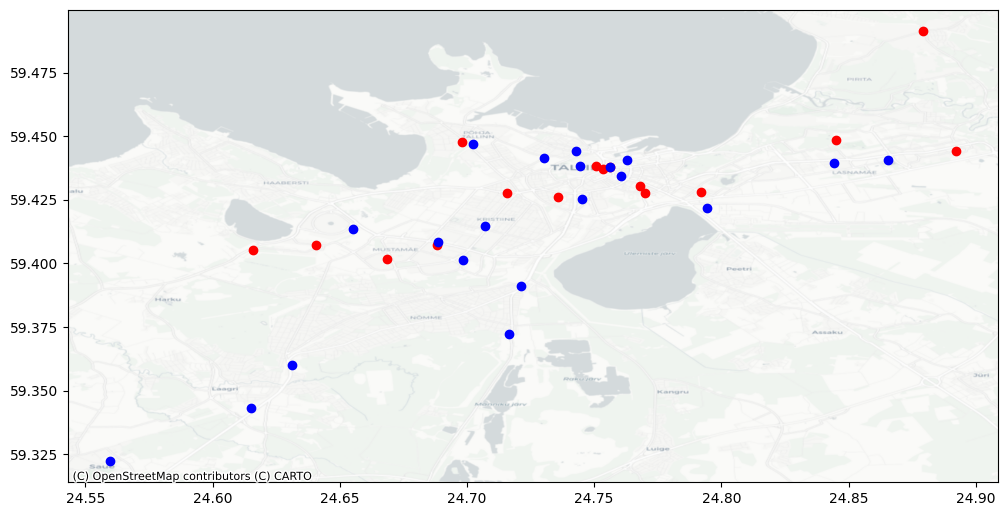

In [25]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from geopy.geocoders import Nominatim
from shapely.geometry import Point, MultiPoint
from pyproj import CRS
import contextily as ctx


origins = pd.read_csv("data/origins.csv")
destinations = pd.read_csv("data/destinations.csv")
destinations["geometry"]=""
origins["geometry"] =""
origins["geometry"] = origins.apply(lambda x: Point(x['x'], x['y']),axis = 1)
destinations["geometry"] = destinations.apply(lambda x: Point(x['x'], x['y']),axis = 1)
origin_points = gpd.GeoDataFrame(origins, geometry='geometry', crs=4326)
destination_points = gpd.GeoDataFrame(destinations, geometry='geometry', crs=4326)

fig, ax = plt.subplots(figsize=(12,8))
ax = origin_points.plot(ax=ax, color="red")
ax = destination_points.plot(ax=ax, color="blue")
ctx.add_basemap(ax,crs=origin_points.crs,source=ctx.providers.CartoDB.Positron)


B. Detect the location using **geocoding techniques**; reverse geocode at least one of the locations (see [hints from geopy documentation](https://geopy.readthedocs.io/en/stable/index.html?highlight=reverse#module-geopy.geocoders)). As output, you should print out information about the location (can be a full address, or just the name of the city):

In [3]:
geolocator = Nominatim(user_agent="locator")
location = geolocator.reverse(origins[['y','x']].loc[0])
print(location.address)

Astangu Rimi super, 4, Kotermaa, Astangu, Haabersti linnaosa, Tallinn, Harju maakond, 13524, Eesti


**2: Retrieve OpenStreetMap data (only streets that can be driven with car) from the area where the points are located.**

- Specify a Polygon that covers the **extent where all the points are located*. 
- Store the extent as a Shapely Polygon stored in a variable called `graph_extent`.
- Add a little bit of buffer around the extent for downloading the graph, so that you cover all routes between the points.
- See hints from this [week's hints page](https://autogis-site.readthedocs.io/en/latest/lessons/L6/exercise-6.html#hints) on how to define the extent.

In [4]:
from shapely.geometry import box
points = origin_points.append(destination_points)
graph_extent = box(minx=min(points.x),miny=min(points.y),maxx=max(points.x),maxy=max(points.y)).buffer(0.05)


C:\Users\Matti\AppData\Local\Temp\ipykernel_4904\636076601.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  points = origin_points.append(destination_points)


In [5]:
# NON-EDITABLE TEST CELL
# The extent should be a shapely Polygon
print(graph_extent)

POLYGON ((24.8921 59.272400000000005, 24.5598 59.272400000000005, 24.554899142983523 59.272640763666395, 24.550045483899193 59.27336073597984, 24.545285766137276 59.27455298321339, 24.540665828381744 59.276206023374435, 24.5362301631587 59.278303936782585, 24.53202148834902 59.280826519384874, 24.528080335791817 59.28374947733187, 24.52444466094067 59.28704466094067, 24.52114947733186 59.29068033579182, 24.51822651938487 59.29462148834902, 24.515703936782582 59.298830163158705, 24.513606023374436 59.30326582838175, 24.511952983213387 59.307885766137275, 24.510760735979837 59.312645483899196, 24.51004076366639 59.31749914298352, 24.5098 59.3224, 24.5098 59.4912, 24.51004076366639 59.49610085701648, 24.510760735979837 59.500954516100805, 24.511952983213387 59.505714233862726, 24.513606023374436 59.510334171618254, 24.515703936782582 59.514769836841296, 24.51822651938487 59.51897851165098, 24.52114947733186 59.52291966420818, 24.52444466094067 59.52655533905933, 24.528080335791817 59.5298

In [6]:
# NON-EDITABLE TEST CELL
# The extent should be a shapely Polygon
print(type(graph_extent))

<class 'shapely.geometry.polygon.Polygon'>


- Use the polygon to fetch the drivable network data with `.graph_from_polygon()` function 
- Remember to specify correct `network_type`
- see [osmnx docs](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.core.graph_from_polygon) for more details
- store the street network a variable called `graph`

In [7]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
graph = ox.graph_from_polygon(graph_extent, network_type="drive")

In [8]:
# NON-EDITABLE TEST CELL
# The graph should be a networkx MultiDiGraph
print(type(graph))

<class 'networkx.classes.multidigraph.MultiDiGraph'>


In [9]:
# NON-EDITABLE TEST CELL
# Check the graph size. The example solution graph size is 28756 (don't panic if yours is not exactly the same, you can still proceed!)
print(graph.size())

27679


**3: Reproject the data into UTM projection, and plot:**
  - the street network (with `gray` color and line width of `0.5` and alpha set to `0.7`)
  - the origin points (with `red` color)
  - destination points (with `blue` color)
  
In the end you should have a map that looks something like following:

![](img/route_network_with_OD_points.png)

<AxesSubplot: >

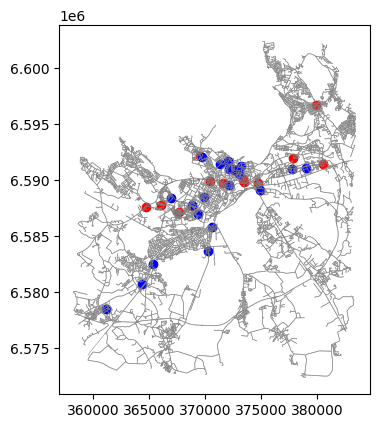

In [10]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
graph_proj = ox.project_graph(graph)
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj)
op_proj = ox.project_gdf(origin_points)
dp_proj = ox.project_gdf(destination_points)
fig,ax=plt.subplots()
edges_proj.plot(ax=ax,linewidth=0.5,color="gray",alpha=0.7)
op_proj.plot(ax=ax, color="red")
dp_proj.plot(ax=ax, color="blue")



### Done!

That's it! Now you can continue with problem 2. 

## Problem 2 (12 points)

In this problem we practice conducting shortest path routing.

### Steps

**1: Calculate the shortest paths between all origin points (16) and destination points (20) using the `length` of the road segments as the impedance measure (in total 320 routes).** 

- To be able to find the shortest paths, you should find the nearest nodes from the graph for both origin and destination points. 
- Notice: if the closest node is the same for both origin and destination point, you should skip the shortest path calculation. - After the routing, you should add the shortest path routes as LineString geometries into a GeoDataFrame called `routes`. 
- You should use the projected graph as the network for the analyses
- remember to use informative variable names, and to comment your code!

osmid  oneway lanes  ref           name  \
u          v          key                                                
6920814    11279496   0     91563671    True     3    1  Peterburi tee   
           1584679220 0     97114010    True     1  NaN            NaN   
1584679220 1103265665 0     97114010    True     1  NaN            NaN   
           1606801948 0    147459192    True     1  NaN            NaN   
10578472   75704748   0     27457613    True   NaN  NaN         Madara   

                               highway maxspeed reversed   length  \
u          v          key                                           
6920814    11279496   0          trunk      110    False  418.566   
           1584679220 0     trunk_link      NaN    False  233.270   
1584679220 1103265665 0     trunk_link      NaN    False   41.646   
           1606801948 0     trunk_link      NaN    False   71.331   
10578472   75704748   0    residential      NaN    False   77.771   

                                                                    geometry  \
u          v          key                                                      
6920814    11279496   0    LINESTRING (382433.690 6591624.034, 382511.965...   
           1584679220 0    LINESTRING (382433.690 6591624.034, 382487.158...   
1584679220 1103265665 0    LINESTRING (382603.745 6591535.485, 382605.264...   
           1606801948 0    LINESTRING (382603.745 6591535.485, 382598.417...   
10578472   75704748   0    LINESTRING (370852.709 6589958.451, 370851.916...   

                          tunnel access width junction bridge  
u          v          key                                      
6920814    11279496   0      NaN    NaN   NaN      NaN    NaN  
           1584679220 0      NaN    NaN   NaN      NaN    NaN  
1584679220 1103265665 0      NaN    NaN   NaN      NaN    NaN  
           1606801948 0      NaN    NaN   NaN      NaN    NaN  
10578472   75704748   0      NaN    NaN   NaN      NaN    NaN

In [78]:
from shapely.geometry import LineString
nearest_o_nd = ox.distance.nearest_nodes(graph_proj, op_proj['geometry'].x, op_proj['geometry'].y)
nearest_d_nd = ox.distance.nearest_nodes(graph_proj, dp_proj['geometry'].x, dp_proj['geometry'].y)
orig_nds = nodes_proj.loc[nearest_o_nd]
target_nds = nodes_proj.loc[nearest_d_nd]
routes = gpd.GeoDataFrame(columns=['geometry'], geometry='geometry',crs=orig_nds.crs)
# Store the shortest path routes as LineString geometries in a GeoDataFrame called routes:
for o in nearest_o_nd:
    for d in nearest_d_nd:
            if o == d:
                continue
            route_nd = nx.shortest_path(graph_proj, source=o, target=d, weight="length")
            geo_route_nd = nodes_proj.loc[route_nd]
            line = LineString(list(geo_route_nd["geometry"].values))
            line_geom = gpd.GeoDataFrame([[line]],geometry='geometry',crs=edges_proj.crs, columns=['geometry'])
            routes = routes.append(line_geom)



C:\Users\Matti\AppData\Local\Temp\ipykernel_4904\2946547100.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  routes = routes.append(line_geom)
C:\Users\Matti\AppData\Local\Temp\ipykernel_4904\2946547100.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  routes = routes.append(line_geom)
C:\Users\Matti\AppData\Local\Temp\ipykernel_4904\2946547100.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  routes = routes.append(line_geom)
C:\Users\Matti\AppData\Local\Temp\ipykernel_4904\2946547100.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  routes = routes.append(line_geom)
C:\Users\Matti\AppData\Local\Temp\ipykernel_4904\2946547

**2: Calculate the distance of the routes in meters into a new column called `route_dist`.**
 

In [81]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
routes["route_dist"] = routes.length

In [82]:
# NON-EDITABLE TEST CELL
print("Shortest distance:", round(routes['route_dist'].min()), "meters")

Shortest distance: 279 meters


In [83]:
# NON-EDITABLE TEST CELL (longest distance in the example solution is 29177 meters)
print("Longest distance:", round(routes['route_dist'].max()), "meters")

Longest distance: 28702 meters


**3: Plot all the routes on top of the street network.** 

In the end you should have something like following:
 
 ![](img/routings.png)

<AxesSubplot: >

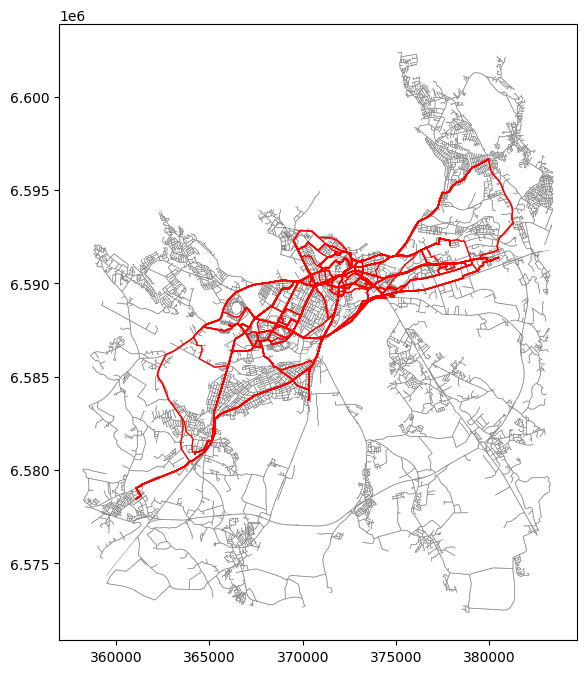

In [84]:
fig,ax = plt.subplots(figsize=(12,8))
edges_proj.plot(ax=ax,linewidth=0.5,color="gray",alpha=0.7)
routes.plot(ax=ax,linewidth=1,color="red")

**4: Calculate the total distance of all the routes (i.e. sum of all route distances)** Update the `total_distance` based on your calculations:

In [85]:
total_distance = 0

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
total_distance = sum(routes["route_dist"])

In [86]:
# NON-EDITABLE TEST CELL (example solution: 2468 kilometers)
#Print your solution:
print("Total distance of all routes is: %.0f kilometers" % (total_distance / 1000))


Total distance of all routes is: 2461 kilometers


### Done!

That's it! Now you have finished all the practical exercises of the course (except final assignment), congratulations! :)